# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [109]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Your Code Here

In [111]:
import warnings
warnings.filterwarnings('ignore')

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [12]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here

import matplotlib.pyplot as plt

In [29]:
#plt.rcParams['figure.figsize']=(12.4, 8)
#fitbit.describe()      No hace falta así

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


In [35]:
fitbit[:5]

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [76]:
fitbit.groupby("Months_encoded").count()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months
Months_encoded,,,,,,,,,,,,,,,,,,,,,
1,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
2,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
3,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
4,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
5,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
6,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
7,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
8,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
9,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


<AxesSubplot:title={'center':'Pasos por mes'}, xlabel='Months_encoded'>

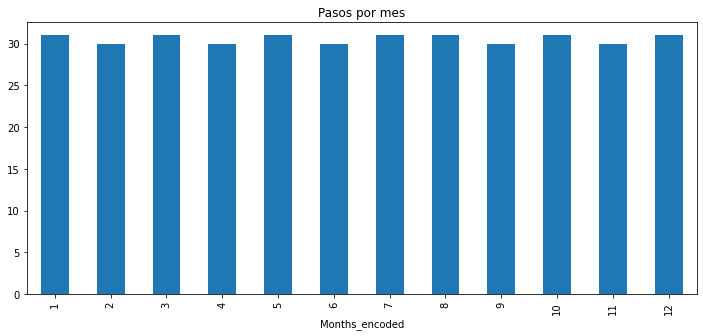

In [86]:
fitbit.groupby("Months_encoded").Steps.count().plot(kind="bar", figsize=(12,5), title="Finde o no")

In [138]:
#plt.savefig('/Figures/pasos_mes.jpg')    #Para guardar, pero no pilla la ruta

([<matplotlib.axis.XTick at 0x7fc588ad6970>,
 [Text(0, 0, 'Laboral'), Text(1, 0, 'Finde')])

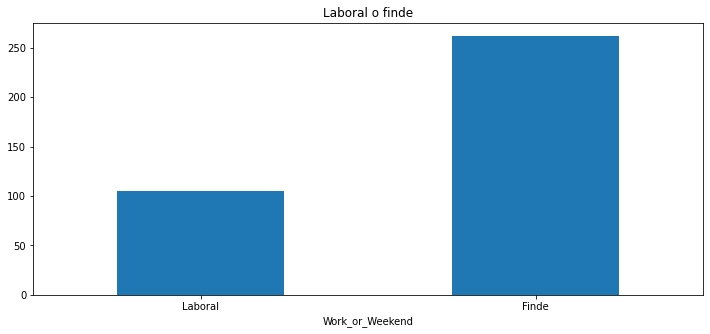

In [98]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
fitbit.groupby("Work_or_Weekend").Steps.count().plot(kind="bar", figsize=(12,5), title="Laboral o finde")
plt.xticks([0, 1], ['Laboral', 'Finde'], rotation=0)   #dejo lo de rotation just in case

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

No handles with labels found to put in legend.


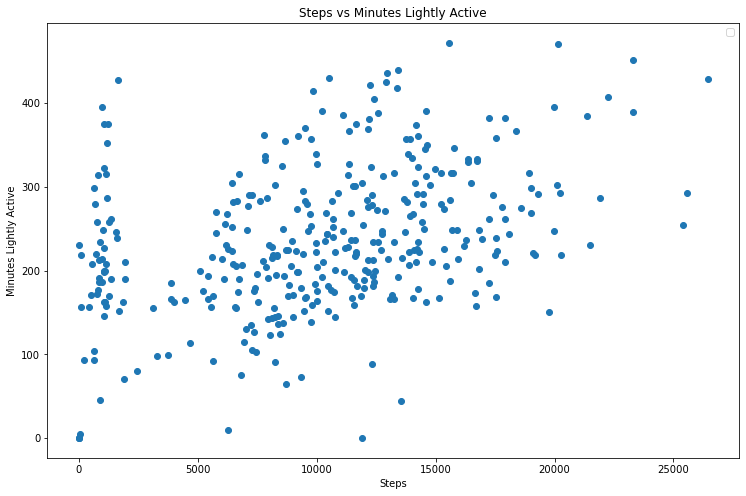

No handles with labels found to put in legend.


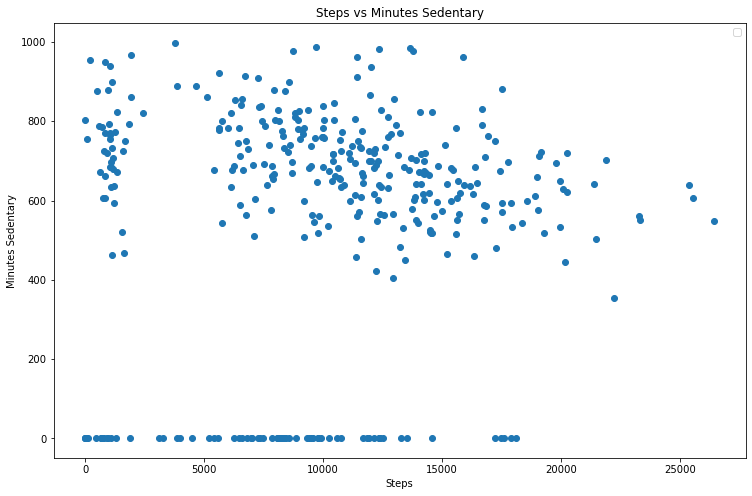

No handles with labels found to put in legend.


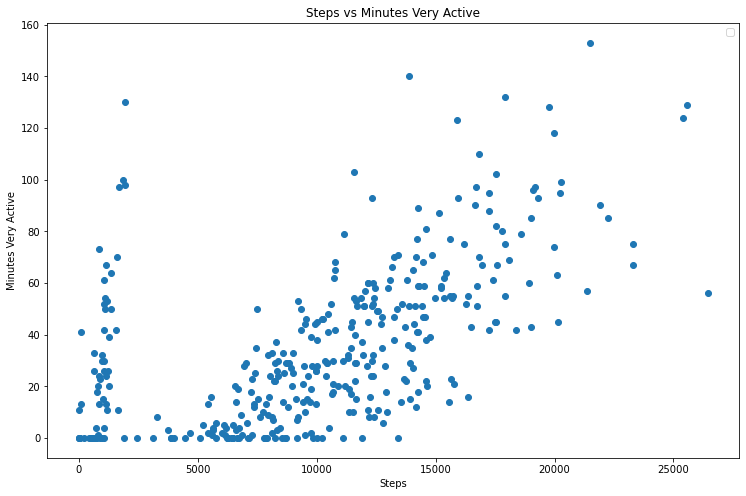

In [112]:
# your code here

columns = ["Minutes Lightly Active", "Steps", "Minutes Sedentary", "Minutes Very Active"]
data=fitbit

x_col = "Steps"
y_columns = ["Minutes Lightly Active", "Minutes Sedentary", "Minutes Very Active"]


for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(data[x_col], data[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.legend()
    plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [117]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')
len(titanic)

1309

In [118]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [121]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [148]:
titanic.Age.fillna(0, inplace= True)

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

<AxesSubplot:xlabel='Age', ylabel='Count'>

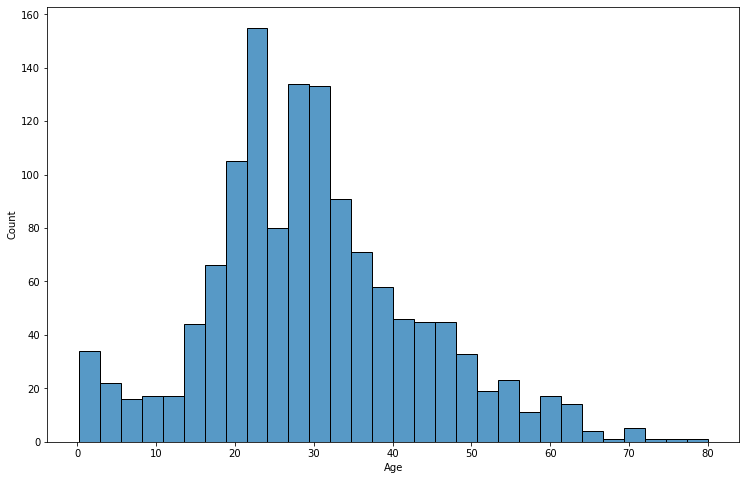

In [150]:
# NUMERICAL VARIABLES
# your code here

age = sns.histplot(x=titanic.Age)
age

<AxesSubplot:ylabel='Frequency'>

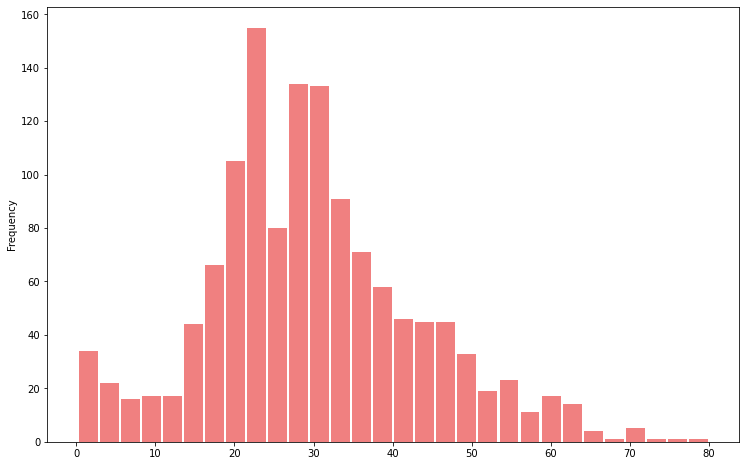

In [156]:
# cambiar color #F08080
titanic.Age.plot.hist(bins=30, color="#F08080",rwidth=0.9)

In [ ]:
# CATEGORICAL VARIABLES
# your code here

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

<AxesSubplot:ylabel='Frequency'>

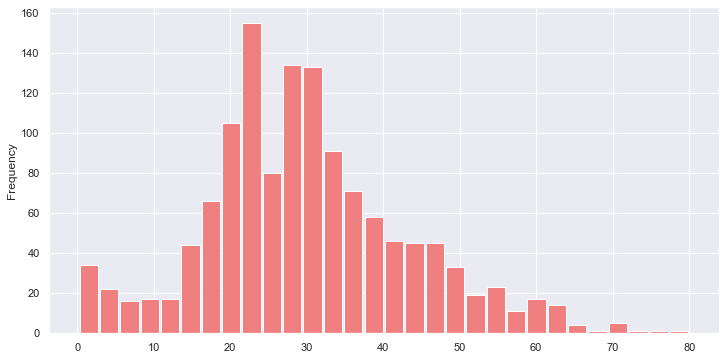

In [162]:
# your code here
sns.set(rc={"figure.figsize": (12.,6.)})
titanic.Age.plot.hist(bins=30, color="#F08080",rwidth=0.9)

#### Use the right visulalization to show the distribution of column `Age`.

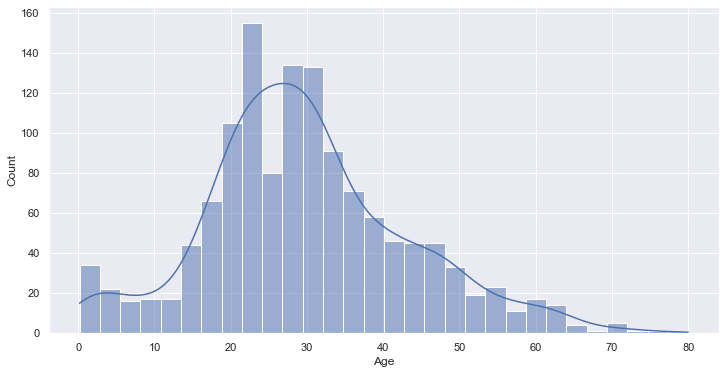

In [163]:
# your code here
sns.histplot(x=titanic.Age, kde=True);


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

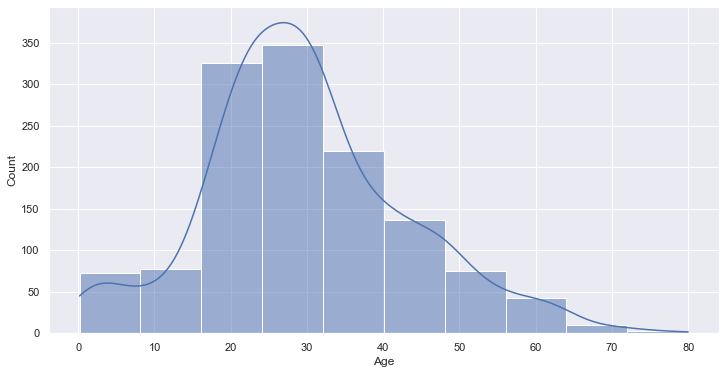

In [169]:
# your code here
sns.histplot(x=titanic.Age, bins=10,kde=True);

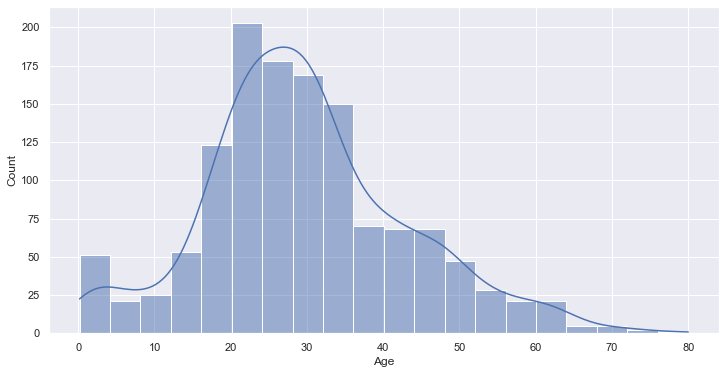

In [170]:
sns.histplot(x=titanic.Age, bins=20,kde=True);

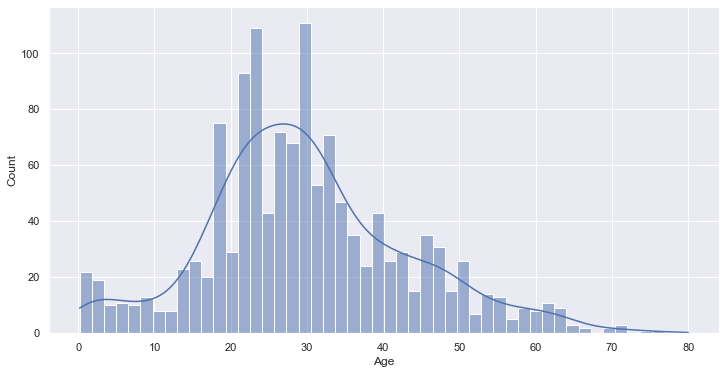

In [171]:
sns.histplot(x=titanic.Age, bins=50,kde=True);

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here

Cuanto mayor es el número en la caja, 'bin', menor es el tamaño de la columna. 

"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here 
# Está arriba

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

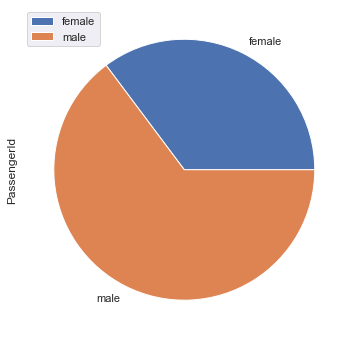

In [179]:
# Method 1 - matplotlib
# your code here
titanic.groupby(['Gender']).sum().plot(kind='pie', y='PassengerId');

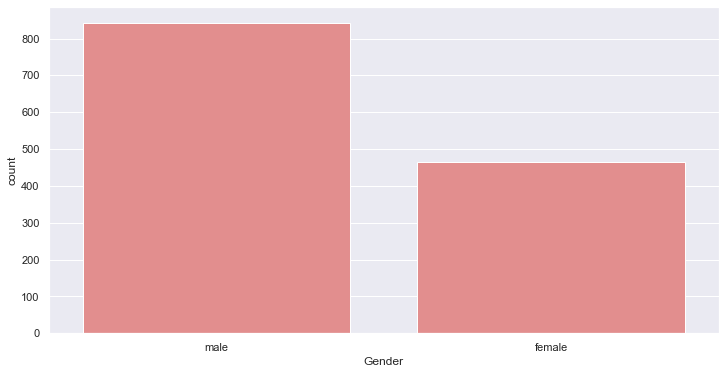

In [177]:
# Method 2 - seaborn
# your code here
sns.countplot(x=titanic.Gender, color='#F08080');

#### Use the right plot to visualize the column `Pclass`.

In [200]:
# your code here
#sns.countplot(x=titanic.Pclass, color='#F08080');    Este es simplemente un conteo 

survived = titanic.groupby(["Survived", "Pclass"]).agg({"Pclass": "count"}).unstack()

#sns.scatterplot(x="Pclass", y="Survived", hue="survived",data=titanic, size="bill_length_mm", sizes=(20,200), alpha=0.5);

survived



Pclass         
Pclass        1   2    3
Survived                
0.0          80  97  372
1.0         136  87  119

In [201]:
#sns.scatterplot(data = titanic, x="Survived", y="Pclass")

([<matplotlib.axis.XTick at 0x7fc572501040>,
 [Text(0, 0, "don't survive"), Text(1, 0, 'survived')])

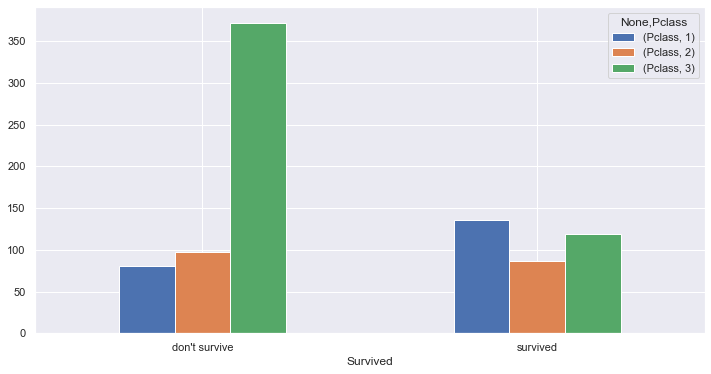

In [203]:
survived.plot(kind="bar")
plt.xticks([0, 1], ["don't survive", 'survived'], rotation=0)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [206]:
# your code here

titanic.Age.describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

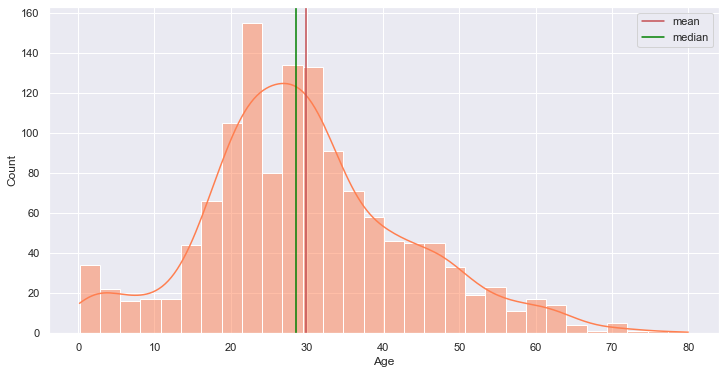

In [216]:
graf = sns.histplot(x=titanic.Age, color="#FF7F50", kde=True) 
graf.axvline(x=titanic.Age.dropna().mean(), c="r", label="mean")
graf.axvline(x=titanic.Age.dropna().median(), c="green", label="median")
plt.legend()
#graf.figure.savefig("../Files/grafico.png", dpi=1000, color = "#FF7F50")   no encuentra la ruta fuck. Lo demás smooth yaaass

In [ ]:
"""
your comments here

Almost everyone on the ship were between 20 and 40 years old. there were few children and some old people
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

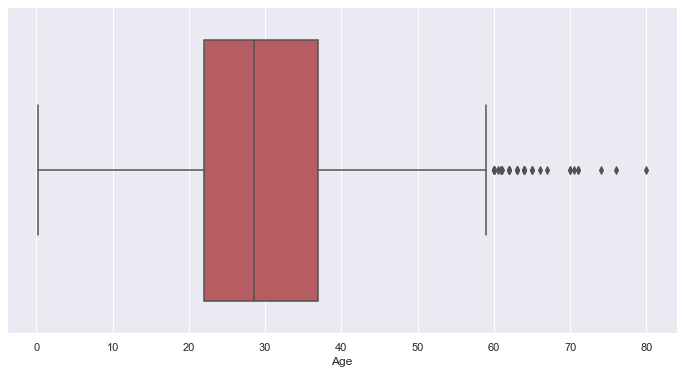

In [221]:
# your code here
sns.boxplot(x="Age", data=titanic, color='r')   #en el de arriba ya tiene la distibución, cuando le he puesto el kde

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [222]:
# your code here

corr = titanic.corr()   #es simétrica
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


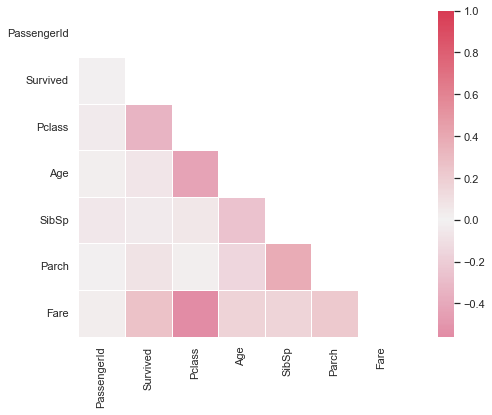

In [231]:
sns.set(style='white')    #Si no le ponemos esto NO se va a dejar de ver la parte que se duplica, de la diagonal para arriba.

mascara=np.triu(np.ones_like(corr, dtype=bool))   
cmap=sns.diverging_palette(0, 7, as_cmap=True)    #color
sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidth=0.7,
            cbar_kws={'shrink': 1}
           );

#### What are the most correlated features?

In [ ]:
"""
your comments here


"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [238]:
# your code here


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here